# Importing the Headlines Dataset

In [ ]:
# Importing packages, libraries and modules
import json
import zipfile
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string
from nltk.util import ngrams

In [ ]:
# Extract the dataset
def extract_sarcasm_dataset(file_name):
    data = []

    # open the zip file in read mode
    with zipfile.ZipFile(file_name, 'r') as z:
        # get the name of the first file in the archive
        file_in_zip = z.namelist()[0]

        # open the file
        with z.open(file_in_zip) as f:
            for line in f:
                # parse each line as a JSON record
                record = json.loads(line.decode("utf-8"))

                # extract the record and append it to data list
                data.append(record)

    # convert the list of dictionaries to a DataFrame
    news_data = pd.DataFrame(data)

    return news_data

# print the first 5 rows of the DataFrame to check the data
news_data = extract_sarcasm_dataset('Sarcasm_Headline_Dataset.json.zip')
news_data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [ ]:
# Reduce the df to contain necessary data only
news_data = news_data[['headline','is_sarcastic']]
news_data


,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0
...,...,...
26704,american politics in moral free-fall,0
26705,america's best 20 hikes,0
26706,reparations and obama,0
26707,israeli ban targeting boycott supporters raise...,0


# Exploratory Data Analysis

## Checking Class Distributions

In [ ]:
# Check whether the data is balanced
print('The dataset is already balanced:')
news_data['is_sarcastic'].value_counts()

The dataset is already balanced:


0    14985
1    11724
Name: is_sarcastic, dtype: int64

## Analysis of of Sarcastic vs Non-sarcastic headlines

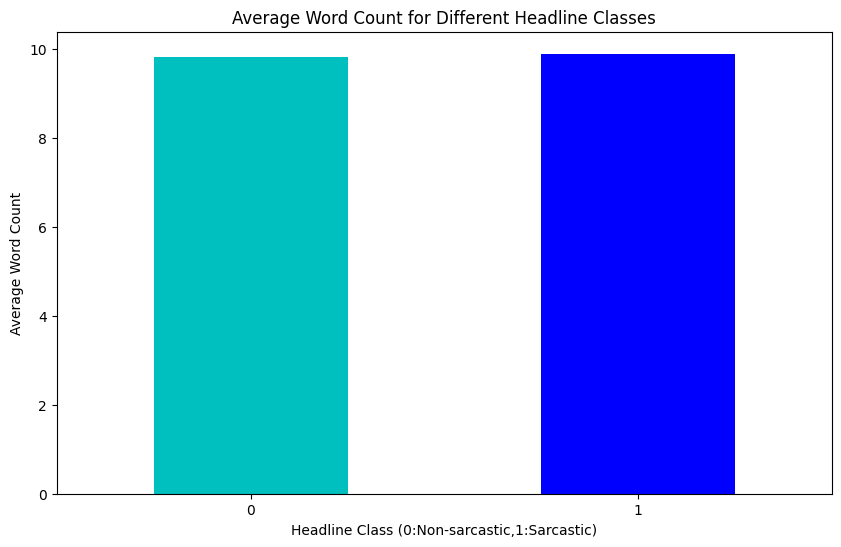

The average word count is:


is_sarcastic
0    9.815616
1    9.884425
Name: word_count, dtype: float64

In [ ]:
# Create the word_count column
news_data = news_data.copy()
news_data['word_count'] = news_data['headline'].apply(lambda x: len(str(x).split()))

# Group by class and calculate the mean word count
mean_word_counts = news_data.groupby('is_sarcastic')['word_count'].mean()

# Plot the graph
plt.figure(figsize=(10,6))
mean_word_counts.plot(kind='bar', color=['c', 'b'])
plt.title('Average Word Count for Different Headline Classes')
plt.xlabel('Headline Class (0:Non-sarcastic,1:Sarcastic)')
plt.ylabel('Average Word Count')
plt.xticks(rotation=0)
plt.show()

print('The average word count is:')
mean_word_counts

## Histograms of wordcount distributions by class

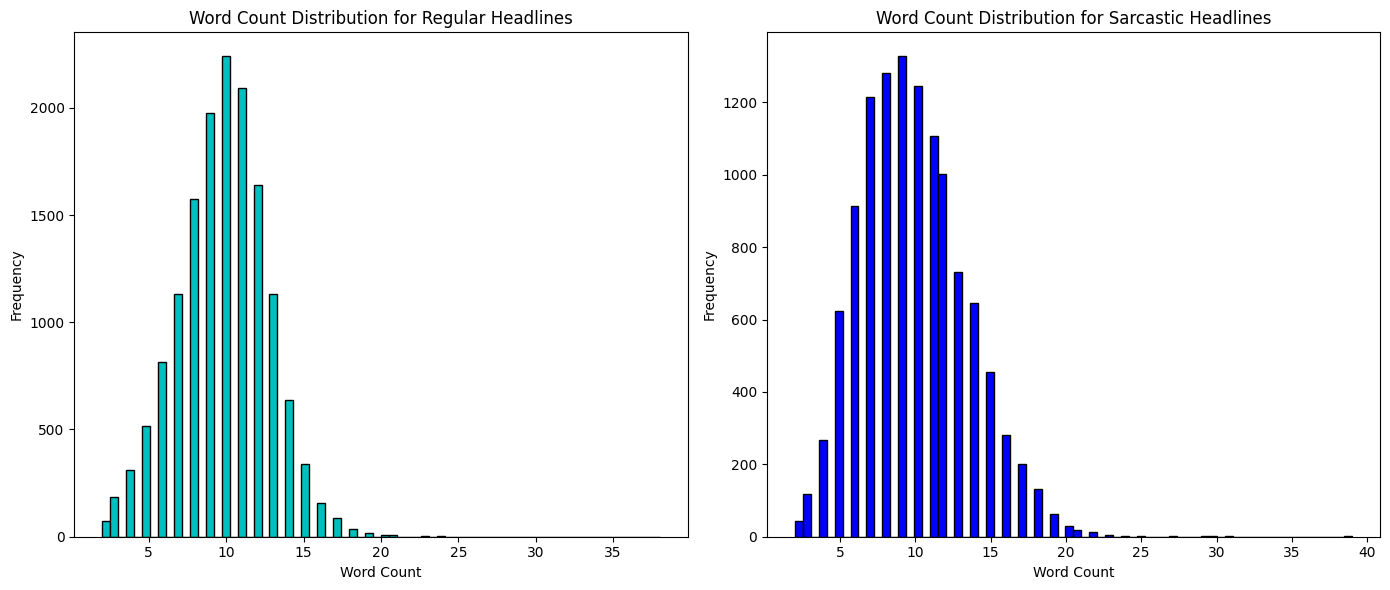

In [ ]:
# Separate regular and sarcastic tweets
regular_headlines = news_data[news_data['is_sarcastic'] == 0]
sarcastic_headlines = news_data[news_data['is_sarcastic'] == 1]
plt.figure(figsize=(14,6))

# Plot histogram for regular tweets
plt.subplot(1, 2, 1)
plt.hist(regular_headlines['headline'].apply(lambda x: len(str(x).split())), bins=70, color='c', edgecolor='black')
plt.title('Word Count Distribution for Regular Headlines')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# Plot histogram for sarcastic tweets
plt.subplot(1, 2, 2)
plt.hist(sarcastic_headlines['headline'].apply(lambda x: len(str(x).split())), bins=70, color='b', edgecolor='black')
plt.title('Word Count Distribution for Sarcastic Headlines')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Histogram of wordcount distribution

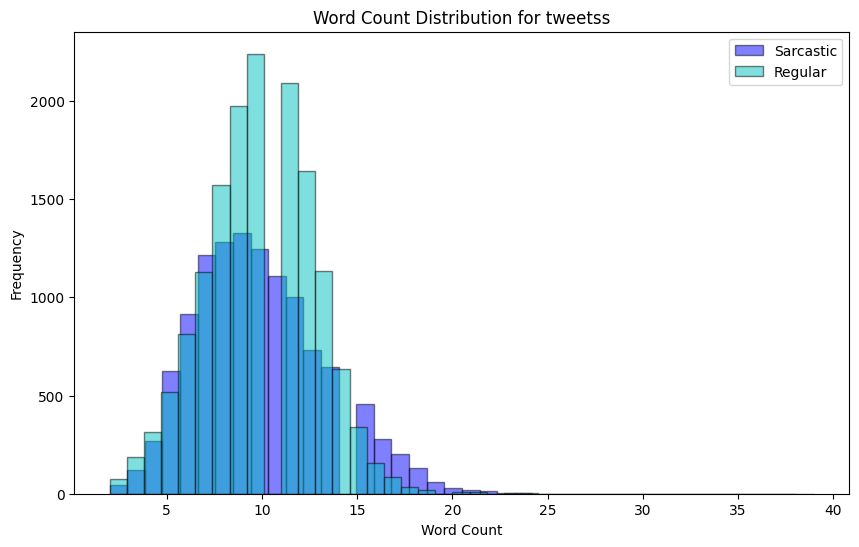

In [ ]:
# Plot histogram for sarcastic comments
plt.figure(figsize=(10,6))
plt.hist(sarcastic_headlines['word_count'], bins=40, color='b', alpha=0.5, label='Sarcastic', edgecolor='black')

# Plot histogram for non-sarcastic comments
plt.hist(regular_headlines['word_count'], bins=40, color='c', alpha=0.5, label='Regular', edgecolor='black')

plt.title('Word Count Distribution for tweetss')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# sarcastic_tweets
sarcastic_headlines.describe()

,is_sarcastic,word_count
count,11724.0,11724.000000
mean,1.0,9.884425
std,0.0,3.497143
min,1.0,2.000000
25%,1.0,7.000000
50%,1.0,10.000000
75%,1.0,12.000000
max,1.0,39.000000


In [ ]:
# regular_tweets
regular_headlines.describe()

,is_sarcastic,word_count
count,14985.0,14985.000000
mean,0.0,9.815616
std,0.0,2.886045
min,0.0,2.000000
25%,0.0,8.000000
50%,0.0,10.000000
75%,0.0,12.000000
max,0.0,38.000000


## Mode Wordcount

In [ ]:
# Mode for word count of sarcastic comments
mode_sarcastic = sarcastic_headlines['word_count'].mode()[0]

# Mode for word count of non-sarcastic comments
mode_regular = regular_headlines['word_count'].mode()[0]

print(f"The mode of the word count for sarcastic tweets is: {mode_sarcastic}")
print(f"The mode of the word count for regular tweets is: {mode_regular}")

The mode of the word count for sarcastic tweets is: 9
The mode of the word count for regular tweets is: 10


# My Observations:




The sarcastic comments contains 11,724 entries, while the non-sarcastic comments comprises 14,985 entries.

Upon analysing the data, the following insights are obtained:

1. Word Count: The mean word count for sarcastic comments is approximately 9.88 words, whereas for non-sarcastic comments, it is around 9.82 words. This indicates that both sarcastic and non-sarcastic comments tend to have similar lengths on average.

2. Word Count Range: The word count ranges from a minimum of 2 words to a maximum of 39 words in sarcastic comments. For non-sarcastic comments, the word count varies between 2 words and 38 words. This demonstrates that both datasets include comments of varying lengths.

3. Word Count Distribution: The distribution of word counts is similar in both datasets, with the 25th percentile, median (50th percentile), and 75th percentile all showing comparable values. This implies that most comments in both categories have a similar length distribution.

4. Mode: The mode of the word count for sarcastic comments is 9 words, indicating that 9 words is the most frequently occurring word count in sarcastic comments. For non-sarcastic comments, the mode of the word count is 10 words, signifying that 10 words is the most common word count in non-sarcastic comments.

The mode values further emphasize the preference for brevity in headlines, with the most frequent word count being 9 for sarcastic comments and 10 for non-sarcastic comments. This suggests that writers can effectively convey sarcasm and non-sarcastic tones within a limited word count, which aligns with the typical headline style.

The context of headlines might influence how sarcasm is conveyed, as readers are accustomed to interpreting humor and sarcasm in short phrases. The use of humor in headlines may aim to attract reader attention, encourage engagement, and provide an interesting angle to news stories. However, recognizing sarcasm in headlines might still be challenging due to the absence of tone and facial expressions.

# Creating a WordCount

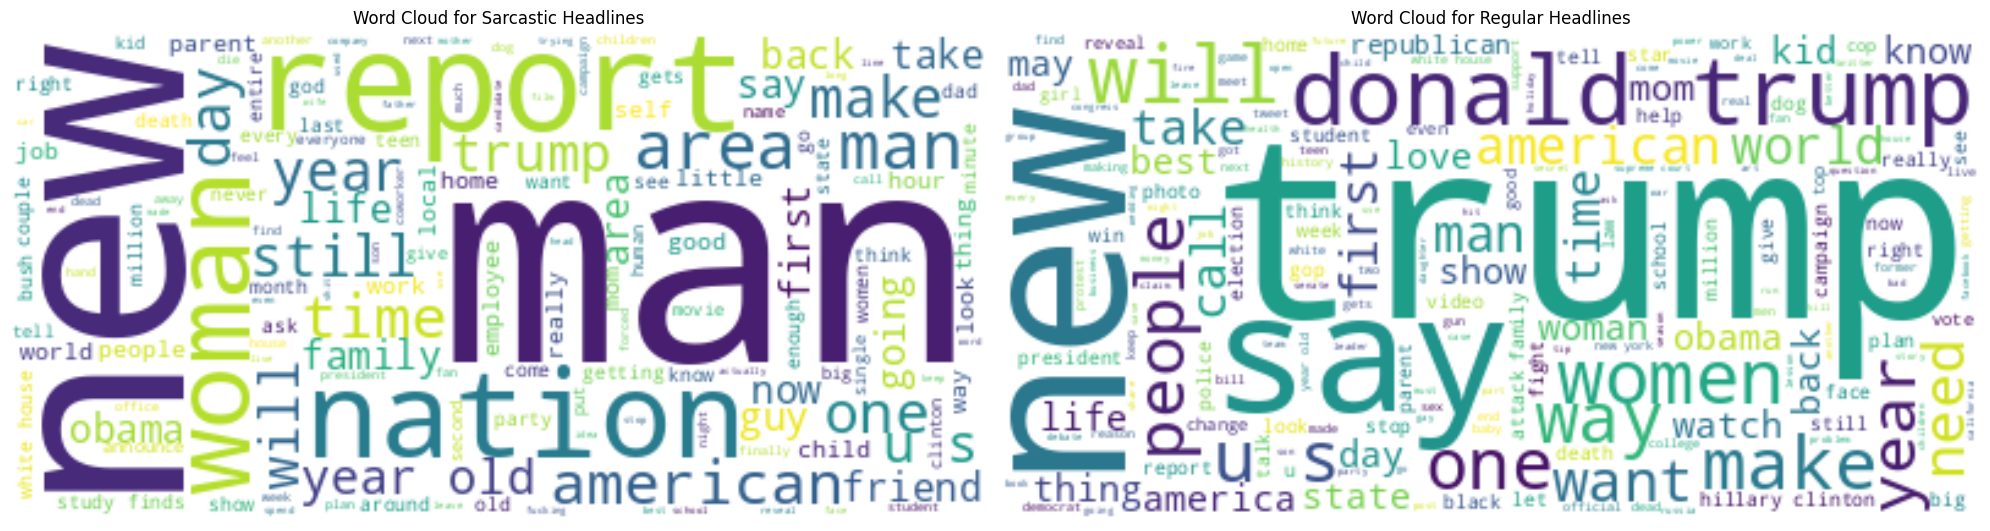

In [ ]:
# Combine all sarcastic comments into one large text
text_sarcastic = " ".join(comment for comment in sarcastic_headlines.headline)

# Combine all non-sarcastic comments into one large text
text_regular = " ".join(comment for comment in regular_headlines.headline)

# Generate the word clouds
wordcloud_sarcastic = WordCloud(background_color="white").generate(text_sarcastic)
wordcloud_non_sarcastic = WordCloud(background_color="white").generate(text_regular)

# Display the word clouds
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_sarcastic, interpolation='bilinear')
plt.title('Word Cloud for Sarcastic Headlines')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_sarcastic, interpolation='bilinear')
plt.title('Word Cloud for Regular Headlines')
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
# Finding the Top10 common and least common terms
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to preprocess and tokenize text
def process_text(text):
    text = text.lower()
    text = "".join([char for char in text if char not in string.punctuation])
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return words

# Process text and find most common and least common words
def analyze_comments(comments):
    words = process_text(" ".join(comments))
    counter = Counter(words)
    most_common = pd.DataFrame(counter.most_common(10), columns=['word', 'frequency'])
    least_common = pd.DataFrame(counter.most_common()[:-11:-1], columns=['word', 'frequency'])
    return most_common, least_common

most_common_sarcastic, least_common_sarcastic = analyze_comments(sarcastic_headlines['headline'])
most_common_regular, least_common_regular = analyze_comments(regular_headlines['headline'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print("Most common words in sarcastic Headlines:")
most_common_sarcastic

Most common words in sarcastic Headlines:


,word,frequency
0,man,1032
1,new,839
2,area,477
3,report,425
4,woman,293
5,one,255
6,time,226
7,day,214
8,us,212
9,study,212


In [ ]:
print("Least common words in sarcastic Headlines:")
least_common_sarcastic

Least common words in sarcastic Headlines:


,word,frequency
0,withhold,1
1,blowhole,1
2,spraying,1
3,playfully,1
4,applauds,1
5,halfpipe,1
6,skateboarder,1
7,drywall,1
8,massacred,1
9,wan,1


In [ ]:
print("Most common words in regular Headlines:")
most_common_regular

Most common words in regular Headlines:


,word,frequency
0,trump,1046
1,new,677
2,donald,455
3,trumps,367
4,us,355
5,says,349
6,one,259
7,women,252
8,first,229
9,people,227


In [ ]:
print("Least common words in regular Headlines:")
least_common_regular

Least common words in regular Headlines:


,word,frequency
0,foodie,1
1,gourmet,1
2,hikes,1
3,freefall,1
4,mailbox,1
5,breached,1
6,gonzalez,1
7,zimbabwes,1
8,fishermans,1
9,bestseller,1


# N-gram Analysis

In [ ]:
# Process text and find most common n-grams
def analyze_comments(comments, ngram_range=(1, 3)):
    words = process_text(" ".join(comments))

    results = []
    for n in range(ngram_range[0], ngram_range[1] + 1):
        ngram_counts = Counter(ngrams(words, n))
        most_common = pd.DataFrame(ngram_counts.most_common(10), columns=['ngram', 'frequency'])
        results.append(most_common)

    return results

unigrams_sarcastic, bigrams_sarcastic, trigrams_sarcastic = analyze_comments(sarcastic_headlines['headline'])
unigrams_regular, bigrams_regular, trigrams_regular = analyze_comments(regular_headlines['headline'])

In [ ]:
print("\nMost common bigrams in sarcastic Headlines:")
bigrams_sarcastic


Most common bigrams in sarcastic Headlines:


,ngram,frequency
0,"(area, man)",225
1,"(study, finds)",103
2,"(white, house)",93
3,"(introduces, new)",61
4,"(area, woman)",42
5,"(new, study)",40
6,"(supreme, court)",38
7,"(unveils, new)",37
8,"(hillary, clinton)",35
9,"(high, school)",35


In [ ]:
print("\nMost common trigrams in sarcastic Headlines:")
trigrams_sarcastic


Most common trigrams in sarcastic Headlines:


,ngram,frequency
0,"(new, study, finds)",33
1,"(new, york, times)",10
2,"(new, report, finds)",8
3,"(way, prevent, says)",8
4,"(prevent, says, nation)",8
5,"(says, nation, regularly)",8
6,"(nation, regularly, happens)",8
7,"(new, evidence, suggests)",7
8,"(report, average, american)",7
9,"(introduces, new, line)",6


In [ ]:
print("\nMost common bigrams in regular Headlines:")
bigrams_regular


Most common bigrams in regular Headlines:


,ngram,frequency
0,"(donald, trump)",349
1,"(hillary, clinton)",128
2,"(donald, trumps)",97
3,"(new, york)",87
4,"(white, house)",82
5,"(supreme, court)",73
6,"(bernie, sanders)",64
7,"(health, care)",59
8,"(climate, change)",58
9,"(morning, email)",56


In [ ]:
print("\nMost common trigrams in regular Headlines:")
trigrams_regular


Most common trigrams in regular Headlines:


,ngram,frequency
0,"(huffpost, rise, need)",22
1,"(rise, need, know)",22
2,"(fridays, morning, email)",15
3,"(funniest, tweets, women)",15
4,"(tweets, women, week)",15
5,"(health, care, bill)",13
6,"(everything, need, know)",13
7,"(women, business, qa)",12
8,"(donald, trump, says)",11
9,"(new, york, city)",11
